In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [14]:
data2122 = pd.read_excel('/Users/richi/Desktop/Knowledge/General Knowledge/Fanta/Data/21-22.xlsx',index_col=0, header=1)
data2021 = pd.read_excel('/Users/richi/Desktop/Knowledge/General Knowledge/Fanta/Data/20-21.xlsx',index_col=0, header=1)
data1920 = pd.read_excel('/Users/richi/Desktop/Knowledge/General Knowledge/Fanta/Data/19-20.xlsx',index_col=0, header=1)
data1819 = pd.read_excel('/Users/richi/Desktop/Knowledge/General Knowledge/Fanta/Data/18-19.xlsx',index_col=0, header=1)
data1718 = pd.read_excel('/Users/richi/Desktop/Knowledge/General Knowledge/Fanta/Data/17-18.xlsx',index_col=0, header=1)

In [7]:
data = pd.concat([data1718,data1819,data1920,data2021,data2122])
data = data[data['Pv']>=20]

In [8]:
p = data[data['R'] == 'P']
d = data[data['R'] == 'D']
c = data[data['R'] == 'C']
a = data[data['R'] == 'A']

# Portieri

In [6]:
X = np.array(p[['Gs']]).reshape(-1,1)
Y = np.array(p[['Mf']])

In [7]:
reg = LinearRegression().fit(X, Y)

In [8]:
print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_)

Intercept:  [5.86423055]
Coefficient:  [[-0.02260693]]


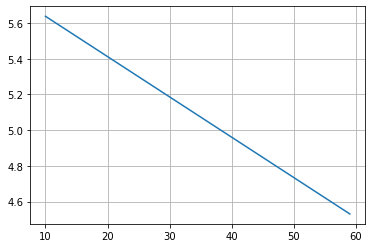

In [9]:
q = reg.intercept_
m = reg.coef_
x = np.array(range(10,60)).reshape((len(range(10,60))),1)
y = q+m*x
plt.plot(x,y.reshape((len(y),1)))
plt.grid(visible=True)

(array([ 1.,  3.,  1.,  8., 10.,  2.,  7., 17.,  7.,  9., 11.,  7.,  6.,
         1.,  2.,  1.,  2.,  0.,  0.,  1.]),
 array([14.  , 17.85, 21.7 , 25.55, 29.4 , 33.25, 37.1 , 40.95, 44.8 ,
        48.65, 52.5 , 56.35, 60.2 , 64.05, 67.9 , 71.75, 75.6 , 79.45,
        83.3 , 87.15, 91.  ]),
 <BarContainer object of 20 artists>)

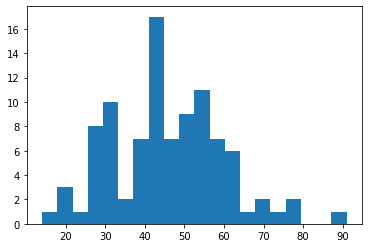

In [10]:
plt.hist(p['Gs'],bins=20)

In [11]:
min(p['Gs'])

14

In [48]:
def por(gs):
    return 5.86-0.0226*gs

# Difensori

In [12]:
X = np.array(d[['Gf','Ass','Amm','Esp']])
Y = np.array(d[['Mf']])

In [13]:
reg = LinearRegression().fit(X, Y)

In [14]:
print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_)

Intercept:  [5.83125903]
Coefficient:  [[ 0.15050112  0.06041392 -0.01989902 -0.09663594]]


In [24]:
def dif(gf,ass,amm,esp):
    return 5.83 + 0.15*gf + 0.06*ass - 0.02*amm - 0.1*esp

# Centrocampisti

In [15]:
X = np.array(c[['Gf','Ass','Amm','Esp']])
Y = np.array(c[['Mf']])

In [16]:
reg = LinearRegression().fit(X, Y)

In [17]:
print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_)

Intercept:  [5.90178828]
Coefficient:  [[ 0.12284627  0.05538634 -0.02142406 -0.06543067]]


In [25]:
def cen(gf,ass,amm,esp):
    return 5.9 + 0.12*gf + 0.055*ass - 0.02*amm - 0.065*esp

# Attaccanti

In [18]:
X = np.array(a[['Gf','Ass','Amm','Esp']])
Y = np.array(a['Mf'])

In [19]:
reg = LinearRegression().fit(X, Y)

In [20]:
print('Intercept: ', reg.intercept_)
print('Coefficient: ', reg.coef_)

Intercept:  5.925493218853914
Coefficient:  [ 0.10527875  0.05915109 -0.02794091 -0.00011621]


In [28]:
def att(gf,ass,amm):
    return 5.925 + 0.105*gf + 0.06*ass - 0.028*amm

(array([19., 37., 46., 47., 18., 27., 33., 11., 15.,  5.,  6.,  6.,  5.,
         2.,  1.,  1.,  3.,  1.,  0.,  1.]),
 array([ 0. ,  1.8,  3.6,  5.4,  7.2,  9. , 10.8, 12.6, 14.4, 16.2, 18. ,
        19.8, 21.6, 23.4, 25.2, 27. , 28.8, 30.6, 32.4, 34.2, 36. ]),
 <BarContainer object of 20 artists>)

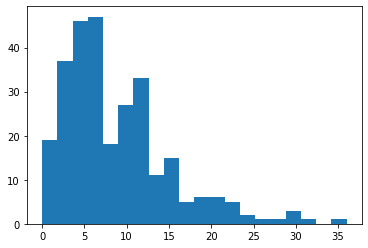

In [21]:
plt.hist(a['Gf'],bins=20)

# Prediction

In [35]:
att(10,2,3)

7.011

In [47]:
cen(8,10,0,0)

7.41

In [52]:
por(40)

4.956